In [1]:
%matplotlib inline
import sys, os
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd

data_dir = os.path.join(os.getcwd(), "data")
import pcse
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

This notebook was built with:
python version: 3.8.10 (default, Sep 28 2021, 16:10:42) 
[GCC 9.3.0] 
PCSE version: 5.5.0


In [9]:
from pcse.fileinput import YAMLCropDataProvider
p = YAMLCropDataProvider(repository="https://raw.githubusercontent.com/ajwdewit/tWOFOST_crop_parameters/master/")

{}

In [14]:
crop_name = 'wheat'
variety_name = 'Winter_wheat_101'
cropd = YAMLCropDataProvider() # pulls from https://github.com/ajwdewit/WOFOST_crop_parameters
cropd.set_active_crop(crop_name, variety_name)
cropd.keys()



dict_keys(['CO2EFFTB', 'CO2TRATB', 'CO2AMAXTB', 'TBASEM', 'TEFFMX', 'TSUMEM', 'IDSL', 'DLO', 'DLC', 'TSUM1', 'TSUM2', 'DTSMTB', 'DVSI', 'DVSEND', 'VERNBASE', 'VERNSAT', 'VERNDVS', 'VERNRTB', 'TDWI', 'RGRLAI', 'SLATB', 'SPA', 'SSATB', 'SPAN', 'TBASE', 'KDIFTB', 'EFFTB', 'AMAXTB', 'TMPFTB', 'TMNFTB', 'CVL', 'CVO', 'CVR', 'CVS', 'Q10', 'RML', 'RMO', 'RMR', 'RMS', 'RFSETB', 'FRTB', 'FLTB', 'FSTB', 'FOTB', 'PERDL', 'RDRRTB', 'RDRSTB', 'CFET', 'DEPNR', 'IAIRDU', 'IOX', 'RDI', 'RRI', 'RDMCR', 'NMAXLV_TB', 'NMAXRT_FR', 'NMAXST_FR', 'NMAXSO', 'NCRIT_FR', 'NRESIDLV', 'NRESIDST', 'NRESIDRT', 'TCNT', 'NFIX_FR', 'PMAXLV_TB', 'PMAXRT_FR', 'PMAXST_FR', 'PMAXSO', 'PCRIT_FR', 'PRESIDLV', 'PRESIDST', 'PRESIDRT', 'TCPT', 'KMAXLV_TB', 'KMAXRT_FR', 'KMAXST_FR', 'KMAXSO', 'KCRIT_FR', 'KRESIDLV', 'KRESIDST', 'KRESIDRT', 'TCKT', 'DVS_NPK_STOP', 'DVS_NPK_TRANSL', 'NLAI_NPK', 'NSLA_NPK', 'NPART', 'NLUE_NPK', 'NPK_TRANSLRT_FR', 'RDRLV_NPK'])

In [15]:
crop_name = 'soybean'
variety_name = 'Soybean_901'
cropd = YAMLCropDataProvider() # pulls from https://github.com/ajwdewit/WOFOST_crop_parameters
cropd.set_active_crop(crop_name, variety_name)
cropd.keys()

dict_keys(['CO2EFFTB', 'CO2TRATB', 'CO2AMAXTB', 'TBASEM', 'TEFFMX', 'TSUMEM', 'IDSL', 'DLO', 'DLC', 'TSUM1', 'TSUM2', 'DTSMTB', 'DVSI', 'DVSEND', 'VERNBASE', 'VERNSAT', 'VERNDVS', 'VERNRTB', 'TDWI', 'RGRLAI', 'SLATB', 'SPA', 'SSATB', 'SPAN', 'TBASE', 'KDIFTB', 'EFFTB', 'AMAXTB', 'TMPFTB', 'TMNFTB', 'CVL', 'CVO', 'CVR', 'CVS', 'Q10', 'RML', 'RMO', 'RMR', 'RMS', 'RFSETB', 'FRTB', 'FLTB', 'FSTB', 'FOTB', 'PERDL', 'RDRRTB', 'RDRSTB', 'CFET', 'DEPNR', 'IAIRDU', 'IOX', 'RDI', 'RRI', 'RDMCR', 'NMAXLV_TB', 'NMAXRT_FR', 'NMAXST_FR', 'NMAXSO', 'NCRIT_FR', 'NRESIDLV', 'NRESIDST', 'NRESIDRT', 'TCNT', 'NFIX_FR', 'PMAXLV_TB', 'PMAXRT_FR', 'PMAXST_FR', 'PMAXSO', 'PCRIT_FR', 'PRESIDLV', 'PRESIDST', 'PRESIDRT', 'TCPT', 'KMAXLV_TB', 'KMAXRT_FR', 'KMAXST_FR', 'KMAXSO', 'KCRIT_FR', 'KRESIDLV', 'KRESIDST', 'KRESIDRT', 'TCKT', 'DVS_NPK_STOP', 'DVS_NPK_TRANSL', 'NLAI_NPK', 'NSLA_NPK', 'NPART', 'NLUE_NPK', 'NPK_TRANSLRT_FR', 'RDRLV_NPK'])

In [16]:
soilfile = os.path.join(data_dir, 'soil', 'ec3.soil')
soild = CABOFileReader(soilfile)

In [19]:
from pcse.util import WOFOST72SiteDataProvider


In [20]:
from pcse.util import WOFOST72SiteDataProvider
sited = WOFOST72SiteDataProvider(WAV=10, CO2=360)
print(sited)

{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 10.0, 'SMLIM': 0.4, 'CO2': 360.0}


In [21]:
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropd, soildata=soild, sitedata=sited)

In [32]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'agro', 'soy.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2006-01-01:
    CropCalendar:
      crop_end_date: 2006-10-20
      crop_end_type: harvest
      crop_name: soybean
      crop_start_date: 2006-04-05
      crop_start_type: emergence
      max_duration: 300
      variety_name: Soybean_901
    StateEvents: null
    TimedEvents: null



In [33]:
from pcse.fileinput import ExcelWeatherDataProvider
weatherfile = os.path.join(data_dir, 'meteo', 'nl1.xls')
wdp = ExcelWeatherDataProvider(weatherfile)
print(wdp)


Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: Netherlands
Station: Wageningen, Location Haarweg
Description: Observed data from Station Haarweg in Wageningen
Source: Meteorology and Air Quality Group, Wageningen University
Contact: Peter Uithol
----Site characteristics----
Elevation:    7.0
Latitude:  51.970
Longitude:  5.670
Data available for 2004-01-02 - 2008-12-31
Number of missing days: 0



In [34]:
from pcse.models import Wofost72_WLP_FD, Wofost72_PP
wofsim = Wofost72_WLP_FD(parameters, wdp, agromanagement)

In [35]:
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2006-10-16,2.0,0.016118,7817.581553,3584.032023,3013.32548,1220.224049,817.138957,0.001215,120.0,0.290636,34.876312
2006-10-17,2.0,0.012079,7817.581553,3584.032023,3013.32548,1220.224049,817.138957,0.000523,120.0,0.290586,34.870315
2006-10-18,2.0,0.012079,7817.581553,3584.032023,3013.32548,1220.224049,817.138957,0.000520,120.0,0.292552,35.106192
2006-10-19,2.0,0.009005,7817.581553,3584.032023,3013.32548,1220.224049,817.138957,0.000553,120.0,0.292847,35.141685
2006-10-20,2.0,0.007025,7817.581553,3584.032023,3013.32548,1220.224049,817.138957,0.000394,120.0,0.292364,35.083647


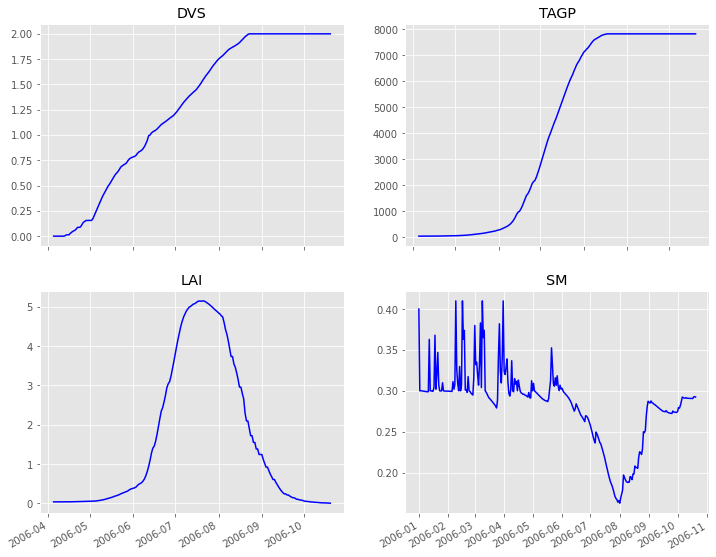

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["DVS", "TAGP", "LAI", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
fig.autofmt_xdate()

In [37]:
df_results.to_csv('data/output.csv', )

In [40]:
summary_output = wofsim.get_summary_output()
msg = "Reached maturity at {DOM} with total biomass {TAGP:.1f} kg/ha, " \
      "a yield of {TWSO:.1f} kg/ha with a maximum LAI of {LAIMAX:.2f}."
for crop_cycle in summary_output:
    print(msg.format(**crop_cycle))

Reached maturity at 2006-08-23 with total biomass 7817.6 kg/ha, a yield of 3584.0 kg/ha with a maximum LAI of 5.15.


In [42]:
summary_output

[{'DVS': 2.0,
  'LAIMAX': 5.147847930808365,
  'TAGP': 7817.581552654196,
  'TWSO': 3584.032023352084,
  'TWLV': 3013.325480218741,
  'TWST': 1220.2240490833701,
  'TWRT': 817.1389569611839,
  'CTRAT': 28.033306212020197,
  'RD': 120.0,
  'DOS': None,
  'DOE': datetime.date(2006, 4, 5),
  'DOA': datetime.date(2006, 6, 13),
  'DOM': datetime.date(2006, 8, 23),
  'DOH': datetime.date(2006, 10, 20),
  'DOV': None,
  'CEVST': 10.27987091978829}]

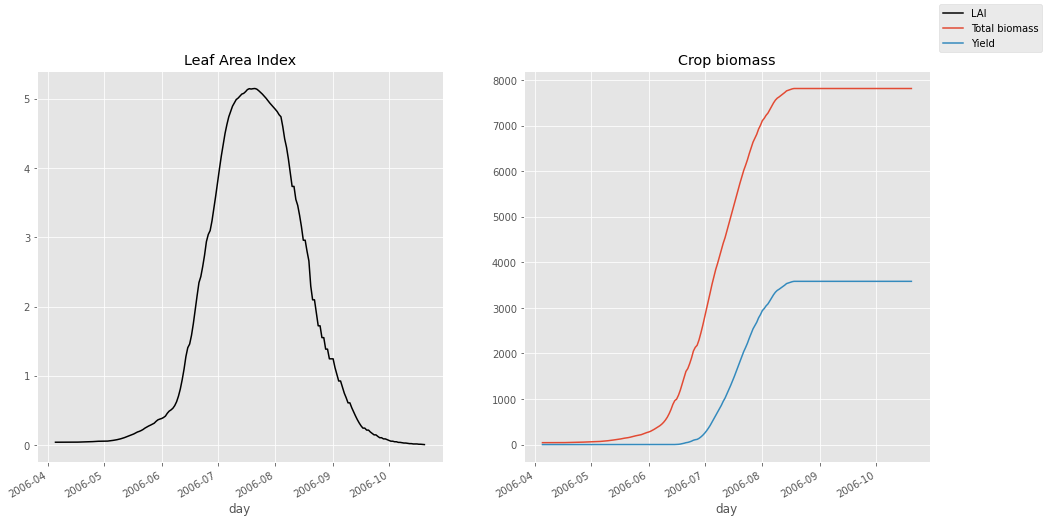

In [41]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
df_results.LAI.plot(ax=axis1, label="LAI", color='k')
df_results.TAGP.plot(ax=axis2, label="Total biomass")
df_results.TWSO.plot(ax=axis2, label="Yield")
axis1.set_title("Leaf Area Index")
axis2.set_title("Crop biomass")
fig.autofmt_xdate()
r = fig.legend()

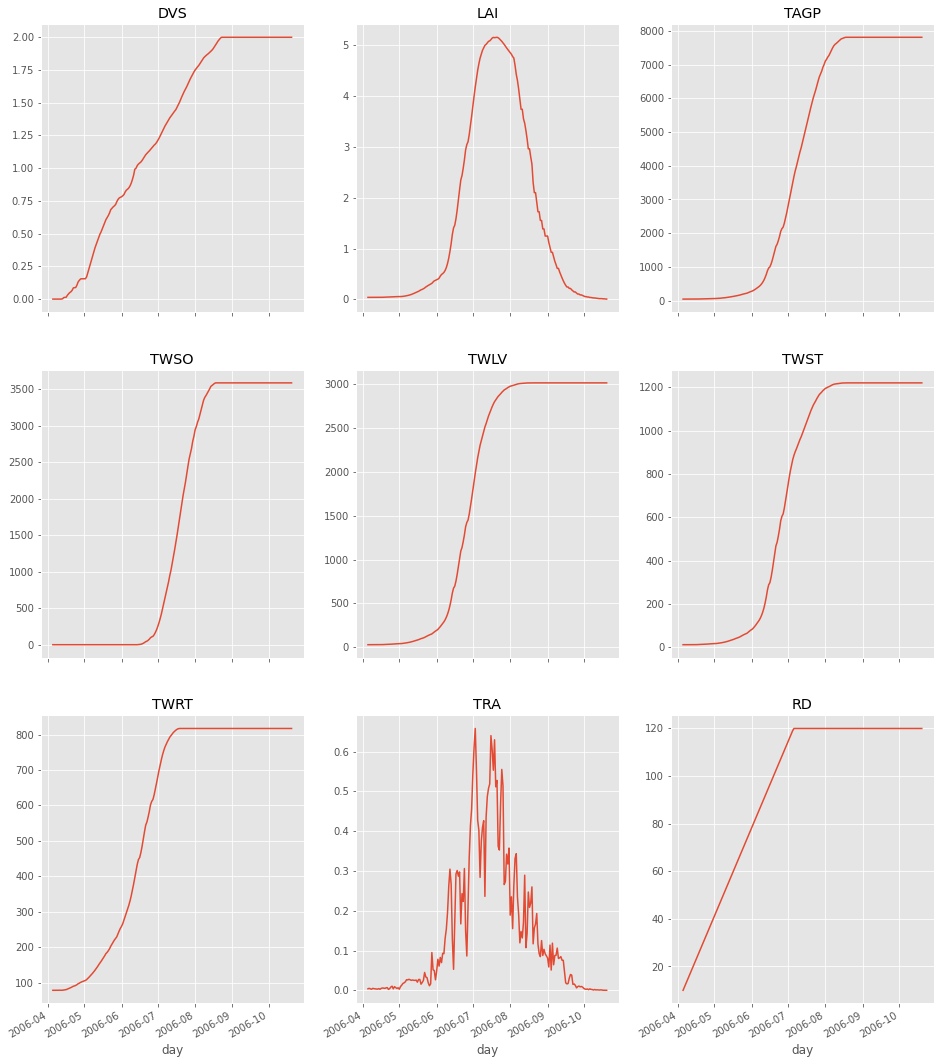

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,20))
for key, axis in zip(df_results.columns, axes.flatten()):
    df_results[key].plot(ax=axis, title=key)
fig.autofmt_xdate()
